In [1]:
# starting imports
import pandas as pd
from utils.utils import Setup
from collections import Counter
from research.main import main, simulate, plot_history

In [2]:
# instantiate setup and teachers
setup = Setup()

In [3]:
# hyperparameters, can be modified
N1 = N2 = setup.N * 1  # for now N=N1=N2
batch_size = setup.P * 1
P1 = setup.P * 1
P2 = setup.P * 1
learning_rate = 1e-2
epochs1 = 500
epochs2 = 500
sgm_e = setup.sgm_e
sgm_w1 = setup.sgm_w * 1
sgm_w2 = setup.sgm_w * 2


Realisation 0/10
Lesson 1/2
Epoch 50/500
----------
train Loss: 0.0098
val Loss: 0.0926
cross_gen Loss: 0.3679


Epoch 100/500
----------
train Loss: 0.0039
val Loss: 0.0942
cross_gen Loss: 0.3836


Epoch 150/500
----------
train Loss: 0.0021
val Loss: 0.0973
cross_gen Loss: 0.3957


Epoch 200/500
----------
train Loss: 0.0013
val Loss: 0.0993
cross_gen Loss: 0.4044


Epoch 250/500
----------
train Loss: 0.0008
val Loss: 0.1001
cross_gen Loss: 0.4108


Epoch 300/500
----------
train Loss: 0.0006
val Loss: 0.1001
cross_gen Loss: 0.4157


Epoch 350/500
----------
train Loss: 0.0004
val Loss: 0.0996
cross_gen Loss: 0.4195


Epoch 400/500
----------
train Loss: 0.0003
val Loss: 0.0988
cross_gen Loss: 0.4224


Epoch 450/500
----------
train Loss: 0.0002
val Loss: 0.0978
cross_gen Loss: 0.4249


Epoch 500/500
----------
train Loss: 0.0002
val Loss: 0.0969
cross_gen Loss: 0.4268


Lesson 2/2
Epoch 50/500
----------
train Loss: 0.0140
val Loss: 0.2678
cross_gen Loss: 0.1453


Epoch 100/500
---

NameError: name 'n_runs' is not defined

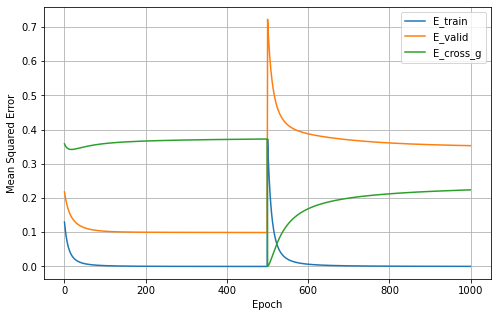

In [4]:
"""
Creates a pair of Teachers (T1, T2),
each teacher generates:
 -P examples of N-parameter random vectors X generated from normal distribution
with variance sgm_w**2
 -P examples of linear signal Y created from random vectors.
 A simple white noise with variance sgm_e**2 is added to the signals.

Generated data is splitted with 2:1 ratio for training/validation purposes.

Creates Student model, together with SGD optimizer with learning ratio lr and MSE loss function.
Prepares training, validation and cross-generalization datasets with scaling of the input vectors.

Runs 2 subsequent lessons runned for epochs1 and epochs2 time.
Returns dictionary with training, validation and cross generalization errors for full simulation
Uses setup organised into "syllabus" list, repeats simulation n_runs times and averages over realisation.
Finally plots resulting errors.
"""

syllabus=[N1, N2,
          P1, P2,
          sgm_w1, sgm_w2,
          sgm_e, learning_rate,
          epochs1, epochs2]
n_runs=10
errors = simulate(syllabus, n_runs)
plot_history(errors, n_runs)